In [4]:
import numpy as np
import pandas as pd

In [5]:
movies = pd.read_csv('tmdb_5000_movies.csv')
credits = pd.read_csv('tmdb_5000_credits.csv')

In [6]:
movies.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800


In [7]:
credits.head(1)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [8]:
credits.head(1)['cast']  # If we want to read about cast

0    [{"cast_id": 242, "character": "Jake Sully", "...
Name: cast, dtype: object

In [9]:
# Now we will merge the two datasets based on the title column

movies.merge(credits,on='title').head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [10]:
movies = movies.merge(credits,on='title')

In [11]:
movies.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


### Now analyse the dataset little bit more:

   - Make sure omit redundancy columns which are not required for our analysis and include whichever is required
   
#### Nutshell:
   - We are doing content based recommender system, basically for every movie we have to create a tags. We have to think in a way whether particular column helps to creat a tags or not.
   - "budget": Basically this column is not useful because, just think if the movie budget is high and you like the movie and it does not mean that you will always like movies which were high budget movies. Based on the budget is not recommended to recommended.
   - "genres*": This is something useful for us. (for example: In our friends oftentimes we discuss with our friends that I like comedy genres movies like that.)
   - "original_language": In this column mostly 95% of the movie languages are in English remaining 5% occupied with other languages. Eventually this column is not gonna help us since it creates bias.
   - "original_title" or "title" both are one and same but there might be the cases where in the original_title column some movies will be in their local languages but not in titles columns.
   - "overview": Is very important because if movie overview is similar with other, based on that I can do recommend.
   - "popularity": could be a better but my intent was to create tags but in my analysis I am not taken into consideration.
   - "production_companies": This i not that much important because just think logically if you want to recommend movie to your friend then will you recommend based on the production company, Absolutely no!
   - "release_date": In my analysis I am not take into consideration but it could be a good feature in some cases it matter because we have a illusion that movies will be hit if it releases in specific period of time. Any way it is numeric feature.
   - "revenue": This is important only but in my work flow it will not sit properly because it is numeric feature not suited for creating tags.
   - "tagline": is not taken into consideration because "overview" column serves the purpose of what tagline does.
 #### Note:
   - Mostly numeric columns I avoided becuase it is not fit in my workflow.
   


### Feature selection

In [12]:
# Columns considered in my workflow

# genres
# id
# keywords
# title 
# overview
# cast
# crew


In [13]:
# fetching those columns 

movies = movies[['movie_id','title','overview','genres','keywords','cast','crew']]

In [14]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4809 entries, 0 to 4808
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4809 non-null   int64 
 1   title     4809 non-null   object
 2   overview  4806 non-null   object
 3   genres    4809 non-null   object
 4   keywords  4809 non-null   object
 5   cast      4809 non-null   object
 6   crew      4809 non-null   object
dtypes: int64(1), object(6)
memory usage: 300.6+ KB


In [15]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


#### Note:

  - From the above dataframe, I want to create new dataframe in which only three column should have. There are "movie_id" "title" "tags".
  - "tags" column: How I should get this column from the above dataframe.
  - I will merge all the columns except "movie-id" and "title" columns with an intent to create "tags" column.
  - Main Intent was: Firstly, I hold the "overview" column and I keep on add keywords at the end of overview column which was there in "genres" column like "[Action]". Similarly I do with "[keywords]" column. However in "cast" column I will add all the cast rather I pick only top 3 cast (actors) [It means based on that I will provide recommendation]. Exactly with [cast] column I only considered "director" from the crew and add at the end of the [overview] column.
  - If I Observe carefully, data will be in dictionary formt for "genres", "keywords", "cast", "crew". There was a lot of information in each dictionary. For example: There is a id, name of the genre of movie whether it was Action movie or some other. Every movie has its own genres and for each has seperate dictionary.
  

### Data Preprocessing:

  - Now It is mandatory before ahead into analysis. For the sake of formality just look whether any cleaning is required or not like handling missing values or outliers

#### Handling missing values

In [16]:
movies.isnull().sum()

movie_id    0
title       0
overview    3
genres      0
keywords    0
cast        0
crew        0
dtype: int64

### Note:

  - See, there are 3 field missed in the overview column. Although it is not big number but anyway it is important feature. Let's try to handle the missing values by means of imputation or dropping. Since it is very very less number I am dropping.

In [17]:
movies.dropna(inplace=True)

#### Check duplicates

In [18]:
movies.duplicated().sum()

0

In [19]:
movies.drop_duplicates(inplace=True)

In [20]:
movies.duplicated().sum()

0

#### Preprocess "genres" column

In [21]:
# To fetch "genres" column data

movies.iloc[0].genres   # iloc[0] first row

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [22]:
# My target output from genres column
# ['Action', 'Adventure', 'FFantasy', 'SciFi']

In [23]:
def convert(obj):
    L = []
    for i in ast.literal_eval(obj):
        L.append(i['name'])
    return L

In [24]:
# To convert string list to list

import ast
ast.literal_eval('[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]')

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 878, 'name': 'Science Fiction'}]

In [25]:
movies['genres'].apply(convert)

0       [Action, Adventure, Fantasy, Science Fiction]
1                        [Adventure, Fantasy, Action]
2                          [Action, Adventure, Crime]
3                    [Action, Crime, Drama, Thriller]
4                [Action, Adventure, Science Fiction]
                            ...                      
4804                        [Action, Crime, Thriller]
4805                                [Comedy, Romance]
4806               [Comedy, Drama, Romance, TV Movie]
4807                                               []
4808                                    [Documentary]
Name: genres, Length: 4806, dtype: object

In [26]:
movies['genres'] = movies['genres'].apply(convert)

In [27]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [28]:
movies['keywords'].apply(convert)

0       [culture clash, future, space war, space colon...
1       [ocean, drug abuse, exotic island, east india ...
2       [spy, based on novel, secret agent, sequel, mi...
3       [dc comics, crime fighter, terrorist, secret i...
4       [based on novel, mars, medallion, space travel...
                              ...                        
4804    [united states–mexico barrier, legs, arms, pap...
4805                                                   []
4806    [date, love at first sight, narration, investi...
4807                                                   []
4808            [obsession, camcorder, crush, dream girl]
Name: keywords, Length: 4806, dtype: object

In [29]:
movies['keywords'] = movies['keywords'].apply(convert)

#### Note:

  - "genres" column has solved now. see above it was completly fine 
  - Now let's do the same thing with "keywords" column

In [30]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


#### Preprocess "cast' column:

  - Since there are many dictionaries are there, each dictionary has details about one actors details. Since we only concerned about top 3 actors.

In [31]:
def convert3(obj):
    L = []
    counter = 0
    for i in ast.literal_eval(obj):
        if counter != 3:
            L.append(i['name'])
            counter+=1
        else:
            break
    return L
    

In [32]:
movies['cast'].apply(convert3)

0        [Sam Worthington, Zoe Saldana, Sigourney Weaver]
1           [Johnny Depp, Orlando Bloom, Keira Knightley]
2            [Daniel Craig, Christoph Waltz, Léa Seydoux]
3            [Christian Bale, Michael Caine, Gary Oldman]
4          [Taylor Kitsch, Lynn Collins, Samantha Morton]
                              ...                        
4804    [Carlos Gallardo, Jaime de Hoyos, Peter Marqua...
4805         [Edward Burns, Kerry Bishé, Marsha Dietlein]
4806           [Eric Mabius, Kristin Booth, Crystal Lowe]
4807            [Daniel Henney, Eliza Coupe, Bill Paxton]
4808    [Drew Barrymore, Brian Herzlinger, Corey Feldman]
Name: cast, Length: 4806, dtype: object

In [33]:
movies['cast'] = movies['cast'].apply(convert3)

In [34]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley]","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux]","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman]","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton]","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [35]:
movies.iloc[0].crew   # movies['crew'][0]  both are same

'[{"credit_id": "52fe48009251416c750aca23", "department": "Editing", "gender": 0, "id": 1721, "job": "Editor", "name": "Stephen E. Rivkin"}, {"credit_id": "539c47ecc3a36810e3001f87", "department": "Art", "gender": 2, "id": 496, "job": "Production Design", "name": "Rick Carter"}, {"credit_id": "54491c89c3a3680fb4001cf7", "department": "Sound", "gender": 0, "id": 900, "job": "Sound Designer", "name": "Christopher Boyes"}, {"credit_id": "54491cb70e0a267480001bd0", "department": "Sound", "gender": 0, "id": 900, "job": "Supervising Sound Editor", "name": "Christopher Boyes"}, {"credit_id": "539c4a4cc3a36810c9002101", "department": "Production", "gender": 1, "id": 1262, "job": "Casting", "name": "Mali Finn"}, {"credit_id": "5544ee3b925141499f0008fc", "department": "Sound", "gender": 2, "id": 1729, "job": "Original Music Composer", "name": "James Horner"}, {"credit_id": "52fe48009251416c750ac9c3", "department": "Directing", "gender": 2, "id": 2710, "job": "Director", "name": "James Cameron"},

#### Preprocess the "crew" column

  - My biggest concern was I consider "director" from the crew despite there are long list of crew. Based on the director I recommend movies.

In [36]:
def fetch_director(obj):
    L = []
    for i in ast.literal_eval(obj):
        if i['job'] == 'Director':
            L.append(i['name'])
            break
    return L

In [37]:
movies['crew'].apply(fetch_director)

0           [James Cameron]
1          [Gore Verbinski]
2              [Sam Mendes]
3       [Christopher Nolan]
4          [Andrew Stanton]
               ...         
4804     [Robert Rodriguez]
4805         [Edward Burns]
4806          [Scott Smith]
4807          [Daniel Hsia]
4808     [Brian Herzlinger]
Name: crew, Length: 4806, dtype: object

In [38]:
movies['crew'] = movies['crew'].apply(fetch_director)

In [39]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron]
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski]
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux]",[Sam Mendes]
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman]",[Christopher Nolan]
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton]",[Andrew Stanton]


#### Note:

  - Now, My data was ready since it was cleaned as per my requirement.

In [40]:
movies['overview'][0]  # Overview column has data in string format whereas other columns have in List format

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.'

#### Note:

  - Now, I will convert the overview data in List format, so that I can concatenate all other column to form a "tag" column.

In [41]:
movies['overview'].apply(lambda x: x.split())

0       [In, the, 22nd, century,, a, paraplegic, Marin...
1       [Captain, Barbossa,, long, believed, to, be, d...
2       [A, cryptic, message, from, Bond’s, past, send...
3       [Following, the, death, of, District, Attorney...
4       [John, Carter, is, a, war-weary,, former, mili...
                              ...                        
4804    [El, Mariachi, just, wants, to, play, his, gui...
4805    [A, newlywed, couple's, honeymoon, is, upended...
4806    ["Signed,, Sealed,, Delivered", introduces, a,...
4807    [When, ambitious, New, York, attorney, Sam, is...
4808    [Ever, since, the, second, grade, when, he, fi...
Name: overview, Length: 4806, dtype: object

In [42]:
movies['overview'] = movies['overview'].apply(lambda x: x.split())

In [43]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron]
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski]
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux]",[Sam Mendes]
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman]",[Christopher Nolan]
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton]",[Andrew Stanton]


#### Note:

  - Now, before concatenate all columns except movies_id and title, we need to apply some transformation on top of "genres", "keywords", "cast", "crew". 
  - For example: "Science Fiction" --> This space between ScienceFiction should be removed.

### Transformation

In [44]:
movies['genres'].apply(lambda x:[i.replace(" ","") for i in x])

0       [Action, Adventure, Fantasy, ScienceFiction]
1                       [Adventure, Fantasy, Action]
2                         [Action, Adventure, Crime]
3                   [Action, Crime, Drama, Thriller]
4                [Action, Adventure, ScienceFiction]
                            ...                     
4804                       [Action, Crime, Thriller]
4805                               [Comedy, Romance]
4806               [Comedy, Drama, Romance, TVMovie]
4807                                              []
4808                                   [Documentary]
Name: genres, Length: 4806, dtype: object

In [45]:
movies['genres'] = movies['genres'].apply(lambda x:[i.replace(" ","") for i in x])
movies['keywords'] = movies['keywords'].apply(lambda x:[i.replace(" ","") for i in x])
movies['cast'] = movies['cast'].apply(lambda x:[i.replace(" ","") for i in x])
movies['crew'] = movies['crew'].apply(lambda x:[i.replace(" ","") for i in x])

In [46]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron]
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski]
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes]
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[ChristianBale, MichaelCaine, GaryOldman]",[ChristopherNolan]
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[TaylorKitsch, LynnCollins, SamanthaMorton]",[AndrewStanton]


#### Note:

  - See above, there was no spaces between words. Transformation has done

### Concatenation of columns to form tags column

In [47]:
movies['tags'] = movies['overview'] + movies['genres'] + movies['keywords'] + movies['cast'] + movies['crew']

In [48]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew,tags
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron],"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski],"[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes],"[A, cryptic, message, from, Bond’s, past, send..."
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[ChristianBale, MichaelCaine, GaryOldman]",[ChristopherNolan],"[Following, the, death, of, District, Attorney..."
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[TaylorKitsch, LynnCollins, SamanthaMorton]",[AndrewStanton],"[John, Carter, is, a, war-weary,, former, mili..."


In [49]:
new_df = movies[['movie_id', 'title', 'tags']]

In [50]:
new_df

,movie_id,title,tags
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send..."
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney..."
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili..."
...,...,...,...
4804,9367,El Mariachi,"[El, Mariachi, just, wants, to, play, his, gui..."
4805,72766,Newlyweds,"[A, newlywed, couple's, honeymoon, is, upended..."
4806,231617,"Signed, Sealed, Delivered","[""Signed,, Sealed,, Delivered"", introduces, a,..."
4807,126186,Shanghai Calling,"[When, ambitious, New, York, attorney, Sam, is..."


#### Convert List to String in tags column

In [51]:
new_df['tags'].apply(lambda x:" ".join(x))

0       In the 22nd century, a paraplegic Marine is di...
1       Captain Barbossa, long believed to be dead, ha...
2       A cryptic message from Bond’s past sends him o...
3       Following the death of District Attorney Harve...
4       John Carter is a war-weary, former military ca...
                              ...                        
4804    El Mariachi just wants to play his guitar and ...
4805    A newlywed couple's honeymoon is upended by th...
4806    "Signed, Sealed, Delivered" introduces a dedic...
4807    When ambitious New York attorney Sam is sent t...
4808    Ever since the second grade when he first saw ...
Name: tags, Length: 4806, dtype: object

In [52]:
new_df['tags'] = new_df['tags'].apply(lambda x:" ".join(x))

C:\Users\sivas\AppData\Local\Temp\ipykernel_3824\3089450492.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags'] = new_df['tags'].apply(lambda x:" ".join(x))


In [53]:
new_df.head()

,movie_id,title,tags
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...
4,49529,John Carter,"John Carter is a war-weary, former military ca..."


In [54]:
new_df['tags'][0]

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization. Action Adventure Fantasy ScienceFiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d SamWorthington ZoeSaldana SigourneyWeaver JamesCameron'

### Convert lowercase 

   - It is recommended but not mandatory

In [55]:
new_df['tags'] = new_df['tags'].apply(lambda x:x.lower())

C:\Users\sivas\AppData\Local\Temp\ipykernel_3824\3214958533.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags'] = new_df['tags'].apply(lambda x:x.lower())


In [56]:
new_df.head()

,movie_id,title,tags
0,19995,Avatar,"in the 22nd century, a paraplegic marine is di..."
1,285,Pirates of the Caribbean: At World's End,"captain barbossa, long believed to be dead, ha..."
2,206647,Spectre,a cryptic message from bond’s past sends him o...
3,49026,The Dark Knight Rises,following the death of district attorney harve...
4,49529,John Carter,"john carter is a war-weary, former military ca..."


### Note:

  - Now, Just think about our main goal, is to build an website in such a way where user will search for the movies and my model
  will gives the recommendation of 5 movies to the user. This was the main Intent.
  - Now, The problem is out of 5000 movies, how can I know which 5 movies is similar to the movies searches by user so that I recommended to the user.
  1. One would be based on the similarities we can say. On what basis we measue similarities i.e. based on tags.
  2. Now my challenge would be calculating similarity between texts of tags. For example: As shown below there was a first movie tags and second movie tags. I suppose to find similarity between them so that I conclude whether both movies have similarity or not then I recommend either of the movie when user search one of the two movies.
  3. Here the main problem is "textual data" in tags column to measure similarity by means of mathematical approach of using scores and all that. 
  4. One simple approach would be finding similar words frequency in both texts based on that we can say both are similarities.
  But anyway this was not good approach.
#### There comes Vectorization plays a vital role.
  

In [57]:
new_df['tags'][0] # first movie tags

'in the 22nd century, a paraplegic marine is dispatched to the moon pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization. action adventure fantasy sciencefiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d samworthington zoesaldana sigourneyweaver jamescameron'

In [58]:
new_df['tags'][1] # second movie tags

"captain barbossa, long believed to be dead, has come back to life and is headed to the edge of the earth with will turner and elizabeth swann. but nothing is quite as it seems. adventure fantasy action ocean drugabuse exoticisland eastindiatradingcompany loveofone'slife traitor shipwreck strongwoman ship alliance calypso afterlife fighter pirate swashbuckler aftercreditsstinger johnnydepp orlandobloom keiraknightley goreverbinski"

## Vectorization

  - Now we will convert the text data into vectors.
  - Vector means simply coordinate
  - 2D vector means (x,y) = (2,3) --> is a vector coordinate.
  - Likewise, for every movie I convert vector (5000 vectors).
  - Based on the vectors, I recommend the movies. For example: for movie1 has vector (2,4), I will recommend movies to the users
  whichever vectors nearest to the (2,4) movie vector as shown below.
  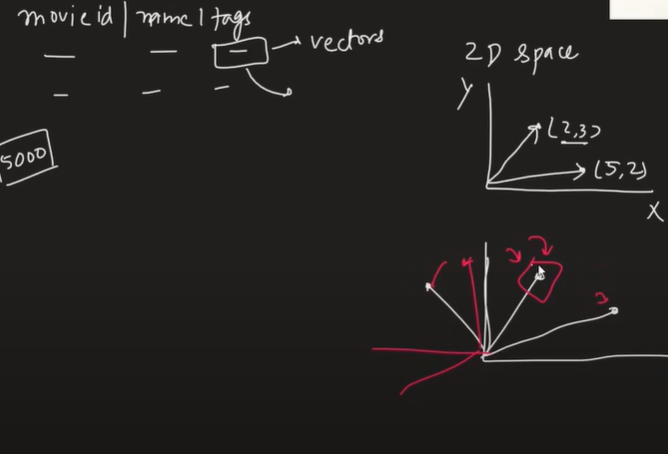
  - We usually called as "text vectarization".
  - Under text vectarization there are many techniques to convert text to vectors.
  1. Bag of words --> More famous technique
  2. tf idf
  3. word to vec
 
  

### Bag of words technique:

  - This technique will concatenate all the words from every tags. Let's say after concatenate 5 million words formed.
  - Now, from the out of 5 million words I will pick up 5000 most common words by means of calculating frequency of the most
  repeated word of 5 Million words and then I pick up top 5000 words.
  - w1, w2, ....., w5000 --> means word1 (let's say "Action) and m1, m2,....m5000 --> means for movie1 respectively.
  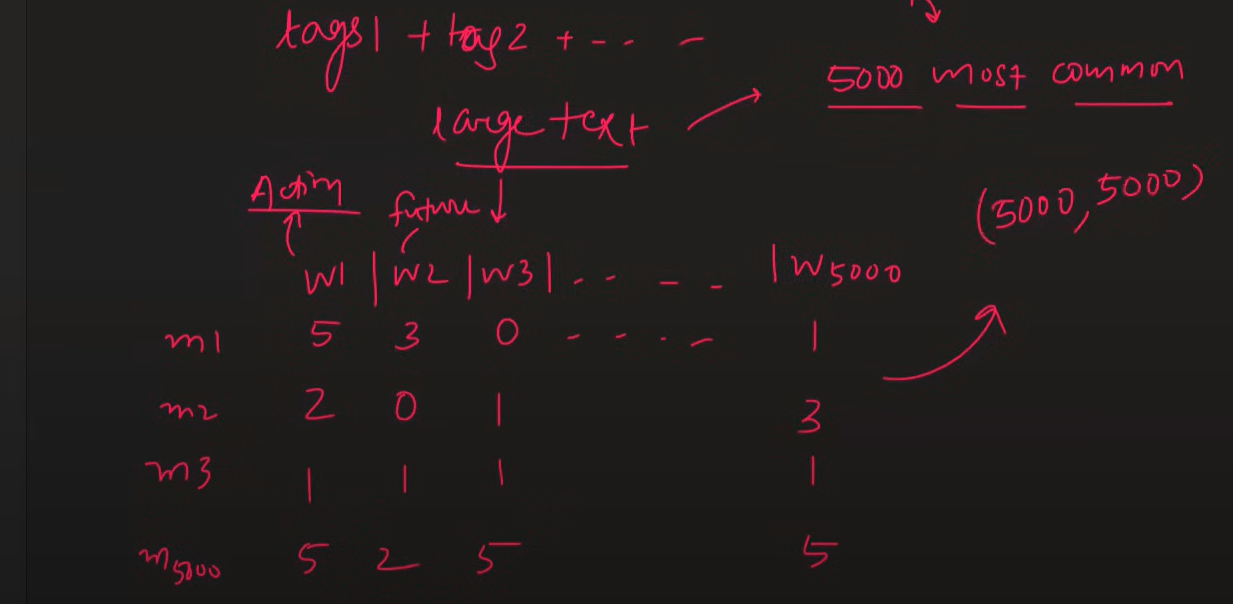
  - (5000,5000) is the vector of (movies, 5000 top most repeated words) as shown in screenshot.
  - Here I picked top 5000 words but there is no thumb rule these many wors we should take. Hit and trail and check which one works well. 
  - Always try to pick medium and not too high and not too low is better.
  

### Stop words

  - While doing vectorization method, usually we don't consider "stop words" rather we delete stop words from the text.
  - Stop words: These words helps to form sentences but actually there is no meaning.
  - For example: of, to, are, for, and, from etc..,

In [59]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,stop_words='english')

In [60]:
vectors = cv.fit_transform(new_df['tags']).toarray()

In [61]:
vectors

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [62]:
vectors.shape

(4806, 5000)

In [63]:
vectors[0]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [64]:
len(cv.get_feature_names_out())   #5000 top most repeated words converted into vector in the form of arrays

5000

In [65]:
cv.get_feature_names_out()

array(['000', '007', '10', ..., 'zone', 'zoo', 'zooeydeschanel'],
      dtype=object)

### Stemming

  - Now, In the 5000 features whatever extracted there might be some words although similar but considered as different features
  For example: 'loved', 'loving', 'love' all are considered as love so that we have flow.
  - Steaming does the same exactly. If I apply steaming on the extracted 5000 words. Then I don't have to worry about that.
#### nltk library have to import to apply stemming.

In [66]:
import nltk

In [67]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [68]:
def stem(text):
    y = []                               # split is used to convert string to list
    
    for i in text.split():               # join is used to convert list to string
        y.append(ps.stem(i))
        
    return " ".join(y)

In [69]:
new_df['tags'].apply(stem)

0       in the 22nd century, a parapleg marin is dispa...
1       captain barbossa, long believ to be dead, ha c...
2       a cryptic messag from bond’ past send him on a...
3       follow the death of district attorney harvey d...
4       john carter is a war-weary, former militari ca...
                              ...                        
4804    el mariachi just want to play hi guitar and ca...
4805    a newlyw couple' honeymoon is upend by the arr...
4806    "signed, sealed, delivered" introduc a dedic q...
4807    when ambiti new york attorney sam is sent to s...
4808    ever sinc the second grade when he first saw h...
Name: tags, Length: 4806, dtype: object

In [70]:
new_df['tags'] = new_df['tags'].apply(stem)

C:\Users\sivas\AppData\Local\Temp\ipykernel_3824\3213734980.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags'] = new_df['tags'].apply(stem)


In [71]:
cv.get_feature_names_out()

array(['000', '007', '10', ..., 'zone', 'zoo', 'zooeydeschanel'],
      dtype=object)

#### Note:

  - Now, we have 4806 movies, so it means we have 4806 vectors formed and each vector has 5000 most repeated words.
## Important:

  - Now, I have to find distance between a movie to all other movies. The more the distance, less similarity.
  - Here we are not finding Eucledian distance instead, I am calculating "cosine" distance.
  - "Eucledian" distance is from point to point distance (two point formula)
  - "Cosine" distance is the distance based on the angle between the lines.
  - less angle, more similarity
  - If we work on high dimensional dataset, Eucledian distance tendency to fail the fetching results as expected.
  - Here we are working on high dimensional space vector (5000,5000) --> High dimensional vector dataset. That is the reason why
  we are using "cosine" distance.
  - All in all eucledian measure is not reliable on high dimensional datsets.

In [72]:
# sklearn cosine similarity search in google just like CounterVectorizer

from sklearn.metrics.pairwise import cosine_similarity

In [73]:
cosine_similarity(vectors)  

array([[1.        , 0.08964215, 0.05976143, ..., 0.02519763, 0.02817181,
        0.        ],
       [0.08964215, 1.        , 0.0625    , ..., 0.02635231, 0.        ,
        0.        ],
       [0.05976143, 0.0625    , 1.        , ..., 0.02635231, 0.        ,
        0.        ],
       ...,
       [0.02519763, 0.02635231, 0.02635231, ..., 1.        , 0.0745356 ,
        0.04836508],
       [0.02817181, 0.        , 0.        , ..., 0.0745356 , 1.        ,
        0.05407381],
       [0.        , 0.        , 0.        , ..., 0.04836508, 0.05407381,
        1.        ]])

### Note:

  - Here, we have calculated the distance of let's say 1st movie to for every 4806 movies distance. like wise we have calculated distance 4806 *4806 times

In [74]:
cosine_similarity(vectors).shape

(4806, 4806)

In [75]:
similarity = cosine_similarity(vectors)

In [76]:
similarity  # It is an array of arrays.

array([[1.        , 0.08964215, 0.05976143, ..., 0.02519763, 0.02817181,
        0.        ],
       [0.08964215, 1.        , 0.0625    , ..., 0.02635231, 0.        ,
        0.        ],
       [0.05976143, 0.0625    , 1.        , ..., 0.02635231, 0.        ,
        0.        ],
       ...,
       [0.02519763, 0.02635231, 0.02635231, ..., 1.        , 0.0745356 ,
        0.04836508],
       [0.02817181, 0.        , 0.        , ..., 0.0745356 , 1.        ,
        0.05407381],
       [0.        , 0.        , 0.        , ..., 0.04836508, 0.05407381,
        1.        ]])

In [77]:
similarity[0]

array([1.        , 0.08964215, 0.05976143, ..., 0.02519763, 0.02817181,
       0.        ])

### create a function for recommend top 5 movies

In [78]:
#To find out the index of the movie

new_df[new_df['title'] == 'Avatar'].index[0]

0

### Note:

  - I need Index position of the movies to recommend movies. If I knew the Index of the particular movie title then I will pentrate into similarity[index], It has every movie distances from that movie.
  - That is my whole Intent

In [79]:
# Basically it fetches, recommended movies index along with their distances with the whichever the movie we selected.
# For similarity[0] --> means first movie has more similarity with 539 index movie with high distance of o.260 likewise 
# it shows 5 movies

sorted(list(enumerate(similarity[0])),reverse =True, key = lambda x:x[1])[1:6]

[(539, 0.26089696604360174),
 (1194, 0.2581988897471611),
 (507, 0.25302403842552984),
 (260, 0.25110592822973776),
 (1216, 0.24944382578492943)]

In [80]:
def recommend(movie):
    movie_index = new_df[new_df['title'] == movie].index[0]
    distances = similarity[movie_index]
    movies_list = sorted(list(enumerate(distances)),reverse=True, key = lambda x:x[1])[1:6]
    
    for i in movies_list:
        print(new_df.iloc[i[0]].title)

In [81]:
recommend('Batman Begins')  # These are the 5 movies indexes recommended If I search Avatar movie.

The Dark Knight
The Dark Knight Rises
Batman
Batman & Robin
Batman


In [82]:
# Now my goal is fetching Movie name because there is no use of indexes

new_df.iloc[539].title


'Titan A.E.'

### Note:

  - The code is working, now I want to convert this into website
  - For making website, we use PyCharm for python development
  - Actually, suppose to use "Flask" to build an website Instead I am using "streamlit" which is a library just to make it simple.

### Pickle Library

  - I have to send the list of movies in the website however. For that reason, I am importing "Pickle" library.

In [85]:
import pickle

#### Note:

  - Here "dump" means I am dumping my dataframe "new_df" open('movies.pkl) --> means I am creating a new file with name "movies.pkl" and open the file in write binary 'wb' mode.
  - Automatically file will be created in your current directory and check.
  - Then I go back into dirctory folder in Desktop where my current location and I copy the file called "movies.pkl" and past it in "Pycharm" project where I am working website.
  - 'rb' --> read binary mode 'wb'--> write binary mode

In [86]:
pickle.dump(new_df,open('movies.pkl', 'wb')) 

In [88]:
new_df['title']   # I need only movies list not entire dataset.

0                                         Avatar
1       Pirates of the Caribbean: At World's End
2                                        Spectre
3                          The Dark Knight Rises
4                                    John Carter
                          ...                   
4804                                 El Mariachi
4805                                   Newlyweds
4806                   Signed, Sealed, Delivered
4807                            Shanghai Calling
4808                           My Date with Drew
Name: title, Length: 4806, dtype: object

In [89]:
new_df['title'].values    # This is in list format

array(['Avatar', "Pirates of the Caribbean: At World's End", 'Spectre',
       ..., 'Signed, Sealed, Delivered', 'Shanghai Calling',
       'My Date with Drew'], dtype=object)

### Important point

  - Rather than sending my dataframe 'new_df' to the website, I will send the dataset in the form of 'dictinary' to the website.
  - Because, It throughs an error.
  - Now, Just see the how I will change my dataframe to dictionary.

In [90]:
new_df.to_dict()

{'movie_id': {0: 19995,
  1: 285,
  2: 206647,
  3: 49026,
  4: 49529,
  5: 559,
  6: 38757,
  7: 99861,
  8: 767,
  9: 209112,
  10: 1452,
  11: 10764,
  12: 58,
  13: 57201,
  14: 49521,
  15: 2454,
  16: 24428,
  17: 1865,
  18: 41154,
  19: 122917,
  20: 1930,
  21: 20662,
  22: 57158,
  23: 2268,
  24: 254,
  25: 597,
  26: 271110,
  27: 44833,
  28: 135397,
  29: 37724,
  30: 558,
  31: 68721,
  32: 12155,
  33: 36668,
  34: 62211,
  35: 8373,
  36: 91314,
  37: 68728,
  38: 102382,
  39: 20526,
  40: 49013,
  41: 44912,
  42: 10193,
  43: 534,
  44: 168259,
  45: 72190,
  46: 127585,
  47: 54138,
  48: 81005,
  49: 64682,
  50: 9543,
  51: 68726,
  52: 38356,
  53: 217,
  54: 105864,
  55: 62177,
  56: 188927,
  57: 10681,
  58: 5174,
  59: 14161,
  60: 17979,
  61: 76757,
  62: 258489,
  63: 411,
  64: 246655,
  65: 155,
  66: 14160,
  67: 15512,
  68: 1726,
  69: 44826,
  70: 8487,
  71: 1735,
  72: 297761,
  73: 2698,
  74: 137113,
  75: 9804,
  76: 14869,
  77: 150540,
  78:

In [92]:
pickle.dump(new_df.to_dict(), open('movie_dict.pkl', 'wb'))

### Note:

  - Since, In my pycharm there was no 'similarity' metric. Then again using 'pickle' library dump the 'similarity to the pycharm

In [93]:
pickle.dump(similarity, open('similarity.pkl', 'wb'))